In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ordinaloss.utils.loss_utils import SinimLoss, SinimLossOld

/home/dsi/itaym/anaconda3/envs/maruloss/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loaded ordinaloss.utils.loss_utils


In [1]:
import numpy as np

In [7]:
r = np.arange(0,5)


array([[1, 3, 5, 7, 9],
       [3, 1, 3, 5, 7],
       [5, 3, 1, 3, 5],
       [7, 5, 3, 1, 3],
       [9, 7, 5, 3, 1]])

In [8]:
def create_cost_matrix(n_classes):
    r = np.arange(0,n_classes)
    return 



array([[1, 3, 5, 7, 9],
       [3, 1, 3, 5, 7],
       [5, 3, 1, 3, 5],
       [7, 5, 3, 1, 3],
       [9, 7, 5, 3, 1]])

In [9]:
from sklearn.metrics import confusion_matrix

In [ ]:
def calc_cost_metric(y_pred, y_true, n_classes=5):
    """_summary_

    Args:
        y_pred (_type_): n*c numpy
        y_test (_type_): n numpy
    """

    r = np.arange(0,n_classes)
    cost_matrix = 2 * np.abs(r-r[:, None])+1
    y_pred = y_pred.argmax(axis=1)
    cm = confusion_matrix(y_pred=y_pred, y_true=y_true, labels = np.arange(0,n_classes))
    
    
    


In [3]:
import torch
from torch import nn

In [12]:
import numpy as np
cls_weights = np.array([[1, 3, 5, 7, 9],
                        [3, 1, 3, 5, 7],
                        [5, 3, 1, 3, 5],
                        [7, 5, 3, 1, 3],
                        [9, 7, 5, 3, 1]], dtype=np.float)

cls_weights = torch.tensor(cls_weights)

/tmp/ipykernel_32121/1851679952.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  [9, 7, 5, 3, 1]], dtype=np.float)


In [13]:
a = torch.tensor([[1,2,3,4,5]], dtype=torch.float32)
a = nn.Softmax(1)(a)
b = torch.tensor([4])
print(SinimLossOld()(a,b))
print(SinimLoss(cls_weights)(a,b))

In [1]:
from ordinaloss.utils.data_utils import create_datasets, load_multi_gpu, load_single_gpu

/home/dsi/itaym/anaconda3/envs/maruloss/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loaded ordinaloss.utils.data_utils


In [2]:
dsets = create_datasets("../datasets/kneeKL224/")
loaders = load_single_gpu(dsets, 16)

In [3]:
from ordinaloss.utils.metric_utils import RunningMetric, BinCounter, StatsCollector

loaded ordinaloss.utils.metric_utils


In [28]:
s = StatsCollector()
for x, y in loaders["test"]:
    s.update(y, y)
s

In [22]:
import numpy as np
import pandas as pd

In [30]:
pd.Series(s.collect_y_true()).value_counts(normalize=True).sort_index()

0    0.385870
1    0.178744
2    0.269928
3    0.134662
4    0.030797
dtype: float64

<AxesSubplot:>

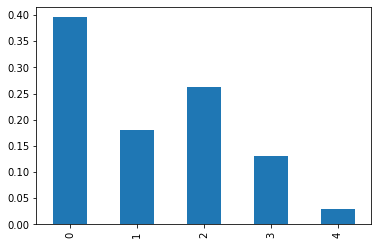

In [27]:
pd.Series(s.collect_y_true()).value_counts(normalize=True).sort_index().plot.bar()

In [8]:
s.collect_y_true()

ValueError: need at least one array to concatenate

In [21]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import torch

In [ ]:
torch.tensor([1,2,3], device=2).tolist()

In [24]:
from pathlib import Path

In [45]:
Path("models", os.environ["HOSTNAME"], f"{uuid.uuid4().hex}.pt")

PosixPath('models/dsicpu01/be052d12bcf747bfb2ca63733fc093b5.pt')

In [23]:
import uuid
uuid.uuid4().hex

'6ef78c3d1afd4e96885490b46513800b'

In [13]:
import numpy as np

In [14]:
from ordinaloss.utils.basic_utils import get_only_metrics
get_only_metrics({"a":3, "v":123, "Z":11.2, "G":[1,4,6], "K":np.array([1,2,3])})

{'a': 3, 'v': 123, 'Z': 11.2}

In [1]:
import mlflow

In [11]:
a = {"asd":3.0, "xxx":2.0, "ZZZ":[1,2,3]}
#a.pop("ZZZ")
isinstance(a["asd"], int)


#mlflow.log_metrics(a)


False

In [11]:
import torch
torch.rand((1000, 5))

tensor([[0.0881, 0.9478, 0.1547, 0.2581, 0.1471],
        [0.2729, 0.6230, 0.3299, 0.8251, 0.2420],
        [0.6818, 0.8793, 0.9149, 0.5630, 0.1598],
        ...,
        [0.7641, 0.4122, 0.3678, 0.6534, 0.0630],
        [0.7970, 0.5063, 0.6189, 0.4730, 0.8577],
        [0.2987, 0.1672, 0.3231, 0.0253, 0.0268]])

In [2]:
import os
import pandas as pd
from ordinaloss.utils.pretrained_models import (classification_model_vgg, 
                                                DummyModel)

from ordinaloss.utils.data_utils import data_load

from ordinaloss.utils.loss_utils import CSCELoss
from ordinaloss.utils.loss_utils import create_ordinal_cost_matrix
from ordinaloss.utils.loss_utils import PredictionLoss, CombinedLoss

from ordinaloss.nextgen_engine import model_engine
from ordinaloss.utils.basic_utils import satisfy_constraints, modify_lambdas


import matplotlib.pyplot as plt

from torch.optim import SGD
import torch

# device = "cuda:0" if torch.cuda.is_available() else "cpu"
# device = "cuda:1" if torch.cuda.is_available() else "cpu"
device = "cuda:2" if torch.cuda.is_available() else "cpu"
#device = "cuda:3" if torch.cuda.is_available() else "cpu"

/home/dsi/itaym/anaconda3/envs/maruloss/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


loaded ordinaloss.utils.pretrained_models
loaded ordinaloss.utils.data_utils
loaded ordinaloss.utils.loss_utils
loaded ordinaloss.utils.metric_utils!!
loaded ordinaloss.nextgen_engine.model_engine 


In [4]:
loaders, _, _ = data_load("../datasets/kneeKL224/", 16)
# out = []
# for Xb, yb, in loaders["test"]:
#     out.append(yb)
# pd.Series(torch.concat(out).numpy()).value_counts(normalize=True, sort=False)

In [1]:
import numpy as np

In [5]:
np.bincount([1,2,3], minlength=7)

array([0, 1, 1, 1, 0, 0, 0])

In [22]:
import os
os.environ

environ{'XDG_SESSION_ID': '56130',
        'HOSTNAME': 'dsicpu01',
        'SHELL': '/bin/bash',
        'HISTSIZE': '1000',
        'SSH_CLIENT': '192.168.2.1 53434 22',
        'CONDA_SHLVL': '1',
        'PYTHONUNBUFFERED': '1',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'VSCODE_HANDLES_SIGPIPE': 'true',
        'PYTHONIOENCODING': 'utf-8',
        'USER': 'itaym',
        'CONDA_EXE': '/home/dsi/itaym/anaconda3/bin/conda',
        'ELECTRON_RUN_AS_NODE': '1',
        'VSCODE_AMD_ENTRYPOINT': 'vs/workbench/api/node/extensionHostProcess',
        'VSCODE_AGENT_FOLDER': '/home/dsi/itaym/.vscode-server',
        '_CE_CONDA': '',
        'PATH': '/home/dsi/itaym/anaconda3/envs/maruloss/bin:/home/dsi/itaym/.vscode-server/bin/e8a3071ea4344d9d48ef8a4df2c097372b0c5161/bin/remote-cli:/home/dsi/itaym/anaconda3/envs/maruloss/bin:/home/dsi/itaym/anaconda3/condabin:/usr/local/bin:/usr/bin:/opt/dell/srvadmin/bin:/usr/local/sbin:/usr/sbin:/home/dsi/itaym/.local/bin:/home/dsi/itaym/bin:/ho

In [21]:
import uuid
#uuid.uuid4().hex
uuid.uuid4().hex


'acc3a65a12d04989a0fbaf6cda0d2274'

In [9]:
META_LEARNING_RATE = 10
LEARNING_RATE = 1.0e-3
WEIGHT_DECAY = 5.0e-2
COST_DISTANCE = 3
DIAGONAL_VALUE = 20
PATIENCE = 3
MIN_DELTA = 0.99

#model = DummyModel()
model = classification_model_vgg("vgg16", num_classes = 5)

engine = model_engine.OrdinalEngine(
    model=model, loss_fn=None, #The loss function would be modified soon.
    device=device, loaders=loaders, n_classes=5,
    use_lr_scheduler=False, callbacks=[],
    optimizer_fn=SGD, lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

#constraints = torch.tensor([0.2,1,1,1,1], device = device)
constraints = torch.tensor([1,1,1,0.05,1], device = device) 

#current_lambdas = torch.tensor([0.0, 0.0, 0.0, 0.0, 0.2], device=device)
current_lambdas = torch.zeros(size=(5,), device=device)

cost_matrix = create_ordinal_cost_matrix(5, cost_distance=COST_DISTANCE, diagonal_value=DIAGONAL_VALUE)

while True:

    print(f"training model with {current_lambdas}")
    csce_loss = CSCELoss(cost_matrix)
    prediction_loss = PredictionLoss(lambdas = current_lambdas)

    loss_fn = CombinedLoss(csce_loss, prediction_loss)
    engine.set_loss_fn(loss_fn) #The loss is assigned again

    engine.train_until_converge(50, patience=PATIENCE, min_delta=MIN_DELTA)
    test_dist = engine.predict_dist_on_test()
    print(f"test_dist: {test_dist}")

    if not satisfy_constraints(test_dist, constraints):
        #modify loss function
        current_lambdas = modify_lambdas(constraints, test_dist, current_lambdas, META_LEARNING_RATE).to(device=device)
        print("Lambdas modified!")

    else:
        break

training model with tensor([0., 0., 0., 0., 0.], device='cuda:2')


Evaluating...: 100%|██████████| 52/52 [00:07<00:00,  6.69it/s, accuracy=0.429, loss=0.676]


inf
0.6762158198160352


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.87it/s, accuracy=0.454, loss=0.633]


0.6762158198160352
0.6331482981365472


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 17.89it/s, accuracy=0.403, loss=0.662]


0.6331482981365472
0.6619434434622887
strike 0! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 17.45it/s, accuracy=0.506, loss=0.584]


0.6331482981365472
0.5838497747231916


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.59it/s, accuracy=0.481, loss=0.617]


0.5838497747231916
0.61731634994396
strike 0! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.12it/s, accuracy=0.522, loss=0.548]


0.5838497747231916
0.5479530093167654


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 19.57it/s, accuracy=0.548, loss=0.533]


0.5479530093167654
0.5330932260136916


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.20it/s, accuracy=0.524, loss=0.57] 


0.5330932260136916
0.5700371688272416
strike 0! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:03<00:00, 16.12it/s, accuracy=0.558, loss=0.511]


0.5330932260136916
0.5113892455655207


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 17.73it/s, accuracy=0.565, loss=0.517]


0.5113892455655207
0.5173505651460144
strike 0! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.94it/s, accuracy=0.517, loss=0.585]


0.5113892455655207
0.585101998169832
strike 1! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:04<00:00, 10.63it/s, accuracy=0.513, loss=0.561]

0.5113892455655207
0.561392106242099
strike 2! didn't increase by mindelta.
model converges


test_dist: tensor([0.2651, 0.0000, 0.5453, 0.1896, 0.0000], device='cuda:2')
Lambdas modified!
training model with tensor([0.0000, 0.0000, 0.0000, 1.3961, 0.0000], device='cuda:2')


Evaluating...: 100%|██████████| 52/52 [00:04<00:00, 11.35it/s, accuracy=0.464, loss=0.737]


inf
0.7369745769165907


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.14it/s, accuracy=0.506, loss=0.634]


0.7369745769165907
0.6339941434652407


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.95it/s, accuracy=0.539, loss=0.58] 


0.6339941434652407
0.5804502073558133


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 18.28it/s, accuracy=0.542, loss=0.569]


0.5804502073558133
0.5694147495611528


Evaluating...: 100%|██████████| 52/52 [00:02<00:00, 17.42it/s, accuracy=0.506, loss=0.667]


0.5694147495611528
0.6668518279424303
strike 0! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:03<00:00, 16.41it/s, accuracy=0.548, loss=0.602]


0.5694147495611528
0.6018118774631122
strike 1! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:05<00:00,  9.94it/s, accuracy=0.551, loss=0.562]


0.5694147495611528
0.5617074575320283


Evaluating...: 100%|██████████| 52/52 [00:04<00:00, 10.42it/s, accuracy=0.565, loss=0.566]


0.5617074575320283
0.5664836722482491
strike 0! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:04<00:00, 11.12it/s, accuracy=0.554, loss=0.556]


0.5617074575320283
0.556422978567442


Evaluating...: 100%|██████████| 52/52 [00:04<00:00, 10.42it/s, accuracy=0.528, loss=0.643]


0.556422978567442
0.6427889206507593
strike 0! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:04<00:00, 10.58it/s, accuracy=0.563, loss=0.626]


0.556422978567442
0.625518301353039
strike 1! didn't increase by mindelta.


Evaluating...: 100%|██████████| 52/52 [00:05<00:00, 10.09it/s, accuracy=0.32, loss=0.908] 

0.556422978567442
0.9081504690589397
strike 2! didn't increase by mindelta.
model converges


test_dist: tensor([0.0471, 0.0048, 0.8225, 0.0000, 0.1256], device='cuda:2')


In [23]:
constraints = torch.tensor([0.2, 1, 1, 1, 1])
test_dist   = torch.tensor([0.6, 0, 0, 0, 0.1])
current_lambdas = torch.ones(5)*0.2

modify_lambdas(constraints, test_dist, current_lambdas)

current_lambdas tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
new_lambdas tensor([0.3846, 0.1538, 0.1538, 0.1538, 0.1538])


tensor([0.3846, 0.1538, 0.1538, 0.1538, 0.1538])

In [ ]:
#model = classification_model_vgg("vgg16", num_classes = 5)

cost_matrix = create_ordinal_cost_matrix(5, cost_distance=3, diagonal_value=20)



#callbacks = [PrintingCallback()]
callbacks = []

engine = model_engine.OrdinalEngine(
    model=model, loss_fn=CSCELoss(cost_matrix), 
    device=device, loaders=loaders, n_classes=5,
    use_lr_scheduler=False, callbacks=callbacks,
    optimizer_fn=SGD, lr=1.0e-3, weight_decay=5.0e-2)

loaded ordinaloss.nextgen_engine.model_engine


In [127]:
cost_matrix = create_ordinal_cost_matrix(5, cost_distance=3, diagonal_value=20)


tensor([1., 1., 1., 1., 1.])

In [4]:
constraints = torch.tensor([0.2, 1, 1, 1, 1])
test_dist   = torch.tensor([0.8, 0, 0, 0, 0.1])
current_lambdas = torch.ones(5)*0.2

In [137]:


constraints = torch.tensor([0.2, 1, 1, 1, 1])
test_dist   = torch.tensor([0.8, 0, 0, 0, 0.1])
current_lambdas = torch.ones(5)*0.2


modify_loss_function(constraints, test_dist, current_lambdas)

tensor([0.5000, 0.1250, 0.1250, 0.1250, 0.1250])